# 데이터셋 톺아보기

패션, 유통, 전자상거래 도메인과 관련된 데이터셋 몇 가지를 취득하고<br>
각 데이터셋의 구조와 항목, 수치 등을 간단하게 분석

# Package Install

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Singapore Fashion Facebook posts

출처 : Kaggle

[Dataset Link](https://www.kaggle.com/datasets/annguyennt/singapore-fashion-facebook-posts)

### Columns

* Brand : post를 게시한 브랜드 명
* post_id : post를 게시한 facebook ID (비식별화된 것으로 보임)
* post_text : 게시된 글
* like : 좋아요 표시 갯수
* comments : 댓글 갯수
* shares : 공유 갯수
* post_url : 게시글 URL 주소
* sentiment_score : 게시글에 대한 감정분석 점수 (+ : 긍정, - : 부정)
* sentiment_magnitude : 게시글에 대한 감정분석 점수 (복합 감정일 경우 점수가 높음)

In [116]:
df = pd.read_csv('datasets/facebook_post.csv')

df.head()

,Brand,post_id,post_text,time,likes,comments,shares,post_url,sentiment_score,sentiment_magnitude
0,DMK,5.311750e+15,Start on the right foot for your first impress...,2021-04-03 11:36:51,177,0,0,https://facebook.com/DMKShoes/posts/5311745528...,0.2,0.7
1,DMK,5.307740e+15,Getting that crop top + wide trousers combo ri...,2021-04-02 15:58:02,216,0,0,https://facebook.com/DMKShoes/posts/5307740495...,0.3,0.9
2,DMK,5.302814e+15,Sweet dreams are made of these - Bubble Dream ...,2021-04-01 16:17:29,385,0,0,https://facebook.com/DMKShoes/posts/5302814246...,0.4,1.2
3,DMK,5.292993e+15,"@annavanticalopez: ""Disney’s CEO, Bob Iger, is...",2021-03-30 15:41:29,214,0,0,https://facebook.com/DMKShoes/posts/5292992840...,0.0,4.5
4,DMK,5.280722e+15,"@annavanticalopez: ""When I first started model...",2021-03-28 11:36:40,118,0,0,https://facebook.com/DMKShoes/posts/5280721625...,0.0,3.4


In [117]:
len(df)

4010

In [118]:
df.isnull().sum()

Brand                     0
post_id                   1
post_text              1416
time                      0
likes                     0
comments                  0
shares                    0
post_url                  1
sentiment_score        1531
sentiment_magnitude    1531
dtype: int64

In [123]:
df.dropna(subset=['post_text'], inplace=True)
df.reset_index(inplace=True)

len(df)

2594

In [124]:
tmp = []

for d in df.post_text.values:
    tmp.append(len(d))

df['post_text_len'] = tmp

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

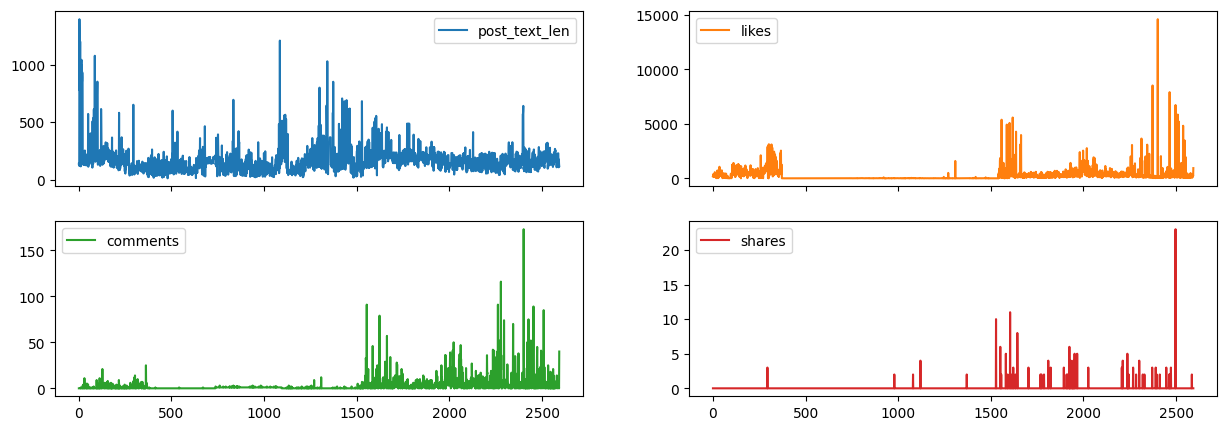

In [148]:
df_vs = df[['post_text_len', 'likes', 'comments', 'shares']]

df_vs.plot(subplots=True, layout=(2,2), figsize=(15,5))

/var/folders/9c/d9bwhd_11tqdj2jhtjf0wmh80000gn/T/ipykernel_97339/830037972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sentiment_score)


<Axes: xlabel='sentiment_score', ylabel='Density'>

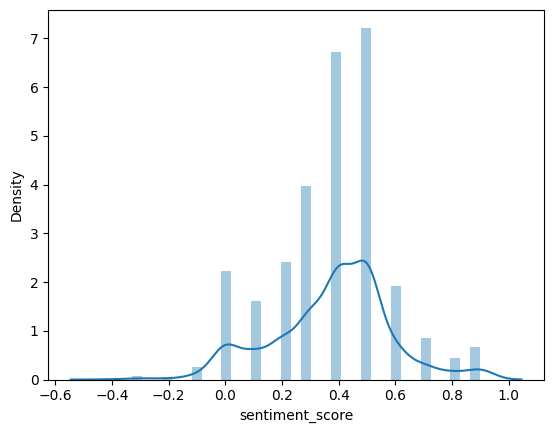

In [159]:
sns.distplot(df.sentiment_score)

## Fashion Retail Sales

출처 : Kaggle

[Dataset Link](https://www.kaggle.com/datasets/fekihmea/fashion-retail-sales)

### Columns

* Customer Reference ID
* Item Purchased
* Purchase Amount (USD)
* Date Purchase
* Review Rating
* Payment Method

In [160]:
df = pd.read_csv('datasets/Fashion_Retail_Sales.csv')

df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [163]:
len(df)

3400

In [161]:
df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [169]:
tmp = df[df['Item Purchased'] == str('Handbag')]

tmp

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
14,4044,Handbag,2122.0,2023-08-01,1.2,Credit Card
83,4067,Handbag,38.0,2023-05-25,3.1,Cash
90,4054,Handbag,12.0,2022-12-29,2.6,Credit Card
118,4073,Handbag,165.0,2023-09-28,3.0,Credit Card
...,...,...,...,...,...,...
3151,4102,Handbag,NaN,2023-06-18,1.0,Cash
3293,4028,Handbag,NaN,2023-05-21,NaN,Credit Card
3302,4093,Handbag,24.0,2022-10-02,2.8,Credit Card
3322,4056,Handbag,87.0,2023-01-16,2.5,Credit Card


In [176]:
row_list = []
# total_df = pd.DataFrame(columns=['Item Purchased', 'Total Sales'])

for d in df['Item Purchased'].unique():
    tmp = df[df['Item Purchased'] == str(d)]
    income = tmp['Purchase Amount (USD)'].sum()
    dict1 = {
        'Item Purchased' : d,
        'Total Sales' : income
    }
    row_list.append(dict1)
    # print(f'{d} 총 매출 : {income}')

total_df = pd.DataFrame(row_list)

total_df.head()

,Item Purchased,Total Sales
0,Handbag,12668.0
1,Tunic,17275.0
2,Tank Top,8296.0
3,Leggings,8087.0
4,Wallet,9372.0
